Simple notebook showing how to fit a Decision Tree to some generated data. This notebook is part of the ADS drug demo. Note that the models used in ADS were generated using Watson Auto AI, this notebook is simply for comparison and to illustrate a tree structure. The models from Watson AutoAI are more complex and reach higher accuracy.

In [1]:
import sklearn
import numpy as np 
import pandas as pd

print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.23.2.


The data shows Age, Gender, Blood Pressure, BMI and the Drug prescribed.

In [2]:
data = pd.read_csv('../data/DrugV2Combined.csv')
data.head()


,Age,Gender,BP,BMI,Drug
0,96,F,H,32,C
1,75,F,H,18,B
2,78,M,N,16,B
3,98,F,H,15,A
4,43,M,L,21,E


The goal of the decision tree will be to predict the drug based on the other features.

Create the X and Y variables.

In [3]:
X = data[['Age', 'Gender', 'BP', 'BMI']].values
X[0:4]

array([[96, 'F', 'H', 32],
       [75, 'F', 'H', 18],
       [78, 'M', 'N', 16],
       [98, 'F', 'H', 15]], dtype=object)

The data in X needs to be transformed from M/F, L/N/H into 0,1 and 0,1,2 respectively.

In [4]:
from sklearn import preprocessing
gender_encoder = preprocessing.LabelEncoder()
gender_encoder.fit(['F','M'])

#transform all rows, but only column 1
X[:,1] = gender_encoder.transform(X[:,1]) 


BP_encoder = preprocessing.LabelEncoder()
BP_encoder.fit([ 'L', 'N', 'H'])

#transform all rows, but only column 2
X[:,2] = BP_encoder.transform(X[:,2]) 

X[0:4]

array([[96, 0, 0, 32],
       [75, 0, 0, 18],
       [78, 1, 2, 16],
       [98, 0, 0, 15]], dtype=object)

Create the Y variable that the decisiontree with predict. 

In [5]:
y = data["Drug"]
y[0:5]

0    C
1    B
2    B
3    A
4    E
Name: Drug, dtype: object

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

Split the data into training and test sets.

In [7]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

Configure the decision tree and fit it to the data.

In [8]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [9]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Use the trained decision tree to predict the drugs in the test set.

In [ ]:
predTree = drugTree.predict(X_testset)

Compare the predicted drugs to the actual drugs in the test set and calculate an accuracy

In [ ]:

from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

Visualise the decision tree

In [ ]:
from sklearn import tree

In [ ]:
fn=['Age','Gender','BP','BMI']
cn=['A', 'B', 'C', 'D', 'E']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
tree.plot_tree(drugTree,
               feature_names = fn, 
               class_names=cn,
               filled = True);





More work is needed to increase the accuarcy of the decision tree. We are getting 91% but 95% is possible.

More work is needed to increase the accuarcy of the decision tree. We are getting 91% but 95% is possible.

In [10]:
predTree = drugTree.predict(X_testset)

Compare the predicted drugs to the actual drugs in the test set and calculate an accuracy

In [14]:

from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.9111111111111111


Visualise the decision tree

In [12]:
from sklearn import tree

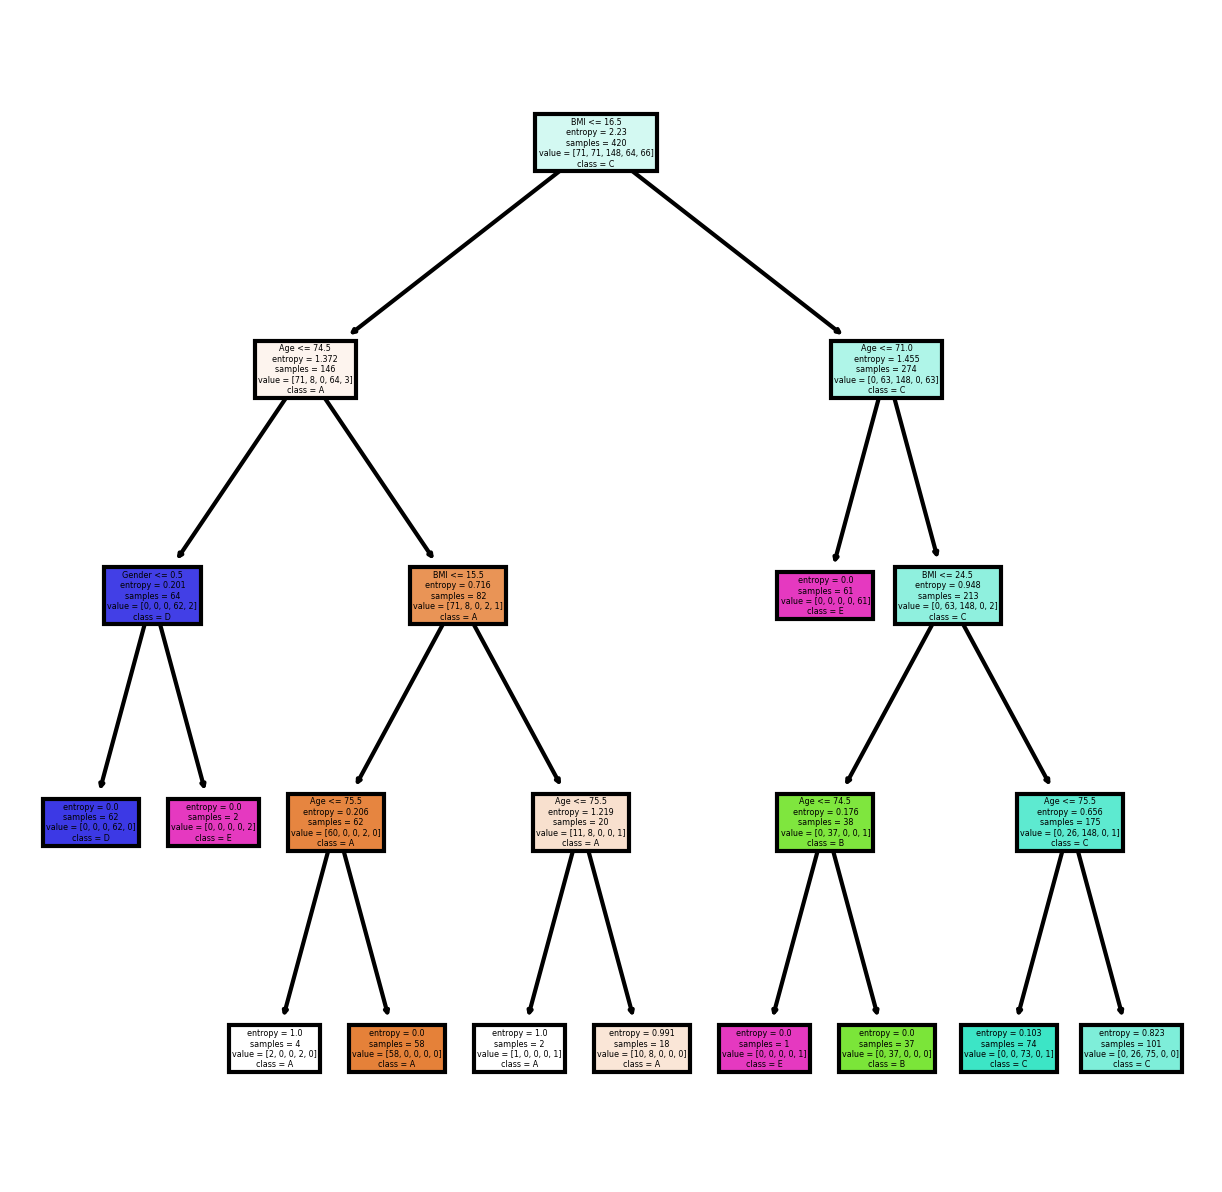

In [15]:
fn=['Age','Gender','BP','BMI']
cn=['A', 'B', 'C', 'D', 'E']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
tree.plot_tree(drugTree,
               feature_names = fn, 
               class_names=cn,
               filled = True);





More work is needed to increase the accuarcy of the decision tree. We are getting 91% but 95% is possible.